# Install Libs

In [1]:
!pip install --upgrade JLpyUtils 
import IPython.display
IPython.display.clear_output()

# Import Libs

In [2]:
import numpy as np
import pandas as pd
import sys, os, importlib, gc
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

import dask, dask.dataframe

In [3]:
pd.options.display.max_columns = 1000
mpl.rcParams['font.size']=14

In [4]:
dev = True

In [5]:
path_desktop = os.path.abspath('..')
if dev:
    print('Running in dev mode. Using local copy of JLpyUtils')
    path_dev_repo = os.path.join(path_desktop,'JLpyUtils')
    sys.path.insert(0, path_dev_repo)

import JLpyUtils
JLpyUtils.__version__

Running in dev mode. Using local copy of JLpyUtils


'0.2.16'

# Build Report Dir

In [6]:
path_report_dir = os.path.join(path_desktop,'outputs','Project_Kaggle_BigQuery-Geotab_Intersection_Congestion')

if os.path.isdir(path_report_dir)==False:
    os.makedirs(path_report_dir)
    
print('path_report_dir:\n',path_report_dir)

path_report_dir:
 /mr3_boltprod_john_t_leonard/Data_Science_Projects./outputs/Project_Kaggle_BigQuery-Geotab_Intersection_Congestion


# Download Data

In [7]:
importlib.reload(JLpyUtils.kaggle)

competition = 'bigquery-geotab-intersection-congestion'

#JLpyUtils.kaggle.setup_config_dir(username='jtleona01', key = 'foo')
# JLpyUtils.kaggle.competition_download_files(competition,
#                                             path_report_dir=path_report_dir)
path_competition_data = os.path.join(path_report_dir,competition)
os.listdir(path_competition_data)

['BigQuery-Dataset-Access.md',
 'test.csv',
 'sample_submission.csv',
 'submission_metric_map.json',
 'train.csv']

# Load Data

In [8]:
df_train = dask.dataframe.read_csv(os.path.join(path_competition_data,'train.csv'))
df_train = df_train.set_index('RowId')

df_field = dask.dataframe.read_csv(os.path.join(path_competition_data,'test.csv'))
df_field = df_field.set_index('RowId')

In [9]:
df_train.head()

,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
RowId,,,,,,,,,,,,,,,,,,,,,,,,,,,
1920335,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1920336,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1920337,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1920338,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1920339,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [10]:
df_field.head()

,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
RowId,,,,,,,,,,,,
0,1,33.75094,-84.39303,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
1,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
2,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
3,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
4,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,2,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta


# Define Headers Dictionary

In [11]:
headers_dict = {}
headers_dict['features'] = list(df_field.columns)
headers_dict['labels'] = [header for header in df_train.columns if ('TotalTime' in header or 'DistanceTo' in header) and ('p20' in header or 'p50' in header or 'p80' in header)]

print('features:\n','\n '.join(headers_dict['features']))
print('\nlabels:\n','\n '.join(headers_dict['labels']))

features:
 IntersectionId
 Latitude
 Longitude
 EntryStreetName
 ExitStreetName
 EntryHeading
 ExitHeading
 Hour
 Weekend
 Month
 Path
 City

labels:
 TotalTimeStopped_p20
 TotalTimeStopped_p50
 TotalTimeStopped_p80
 DistanceToFirstStop_p20
 DistanceToFirstStop_p50
 DistanceToFirstStop_p80


## Inspect Uniques

In [13]:
n_uniques={}
for label, df in [['df_train',df_train],
                  ['df_field',df_field]]:
    
    print('\n------ '+label +' n_uniques ------')
    for feat in headers_dict['features']:
        uniques = df[feat].compute().sort_values().unique()
        n_uniques[feat] = len(uniques)
        print(feat,':', n_uniques[feat])
        if n_uniques[feat]<20:
            print('\t',uniques)

------ df_train n_uniques ------
IntersectionId : 2539
Latitude : 4505
Longitude : 4541
EntryStreetName : 1708
ExitStreetName : 1694
EntryHeading : 8
	 ['E' 'N' 'NE' 'NW' 'S' 'SE' 'SW' 'W']
ExitHeading : 8
	 ['E' 'N' 'NE' 'NW' 'S' 'SE' 'SW' 'W']
Hour : 24
Weekend : 2
	 [0 1]
Month : 9
	 [ 1  5  6  7  8  9 10 11 12]
Path : 15111
City : 4
	 ['Atlanta' 'Boston' 'Chicago' 'Philadelphia']
------ df_field n_uniques ------
IntersectionId : 2768
Latitude : 5613
Longitude : 5614
EntryStreetName : 2137
ExitStreetName : 2118
EntryHeading : 8
	 ['E' 'N' 'NE' 'NW' 'S' 'SE' 'SW' 'W']
ExitHeading : 8
	 ['E' 'N' 'NE' 'NW' 'S' 'SE' 'SW' 'W']
Hour : 24
Weekend : 2
	 [0 1]
Month : 9
	 [ 1  5  6  7  8  9 10 11 12]
Path : 19855
City : 4
	 ['Atlanta' 'Boston' 'Chicago' 'Philadelphia']


# Vectorize Multi-Word Text

In [40]:
def cleanup_text_columns(df):
    for header in df.columns:
        if df[header].dtype==type(object) or df[header].dtype==type(str):
            for illegal_str in ['-','_','%',',','.']:
                df[header] = df[header].str.replace(illegal_str, ' ')
    return df
        
df_train = cleanup_text_columns(df_train)
df_field = cleanup_text_columns(df_field)

In [60]:
%%time
def vectorize_text_columns(df, vect_length = 100):
    """
    Vectorize all the text columns in a dataframe
    """
    
    import sklearn.decomposition
    import joblib
    
    assert(vect_length<=768), 'bert.word2vect returns vectors of 768, choose a vect_length less than or equal to 768.'
    
    df = df.copy()
    
    Vectorizer = JLpyUtils.ML.NeuralNet.Bert.word2vect(model_ID='bert-base-uncased')
    
    for header in df.columns:
        if (df[header].dtype==type(object) or df[header].dtype==type(str))\
            and df[header].nunique()>100:
            
            df[header] = df[header].fillna('missing_value')
            
            texts = list(df[header].unique())
            
            vects = []
            for t in range(len(texts)):
                
                print(header,'Progress:',round(t/len(texts)*100,3),'%',end='\r')
                
                vects.append(Vectorizer.fit_transform(texts[t]))
            
            PCAer = sklearn.decomposition.PCA(n_components=vect_length)
            PCAer.fit(vects)
            
            vects = PCAer.transform(vects)
            vects = pd.DataFrame(vects, columns=[header+'_vect'+str(v) for v in range(len(vects[0]))])
            vects[header] = texts
            
            df = pd.merge(df, vects, on=header)
            df = df.drop(columns = [header])
            
    return df

vectorized_data_suffix = '.Bert.Word2Vec.PCA'
path_save_folder = os.path.join(path_report_folder, 'outputs')

vect_length= 100

if 'df_train'+vectorized_data_suffix+'_batch0.csv' not in os.listdir(path_save_folder):
    
    df_train = vectorize_text_columns(df_train, vect_length=vect_length)
    df_train = dask.dataframe.from_pandas(df_train, npartitions = 10 )
    
    JLpyUtils.file_utils.save(df_train, 'df_train'+vectorized_data_suffix, 'csv', path_save_folder)
else:
    df_train = JLpyUtils.file_utils.load('df_train'+vectorized_data_suffix, 'csv', path_save_folder)
    
if 'df_field'+vectorized_data_suffix+'_batch0.csv' not in os.listdir(path_save_folder):
    
    df_field = vectorize_text_columns(df_field, vect_length=vect_length)          
    df_field = dask.dataframe.from_pandas(df_field, npartitions = 10 )

    JLpyUtils.file_utils.save(df_field, 'df_field'+vectorized_data_suffix, 'csv', path_save_folder)
    
else:
    df_field = JLpyUtils.file_utils.load('df_field'+vectorized_data_suffix, 'csv', path_save_folder)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



CPU times: user 6d 11h 3min 36s, sys: 8h 41min 20s, total: 6d 19h 44min 57s
Wall time: 2d 23h 12min 44s


In [14]:
df_train.head().dtypes

IntersectionId               int64
Latitude                   float64
Longitude                  float64
EntryStreetName             object
ExitStreetName              object
EntryHeading                object
ExitHeading                 object
Hour                         int64
Weekend                      int64
Month                        int64
Path                        object
TotalTimeStopped_p20         int64
TotalTimeStopped_p40         int64
TotalTimeStopped_p50         int64
TotalTimeStopped_p60         int64
TotalTimeStopped_p80         int64
TimeFromFirstStop_p20        int64
TimeFromFirstStop_p40        int64
TimeFromFirstStop_p50        int64
TimeFromFirstStop_p60        int64
TimeFromFirstStop_p80        int64
DistanceToFirstStop_p20    float64
DistanceToFirstStop_p40    float64
DistanceToFirstStop_p50    float64
DistanceToFirstStop_p60    float64
DistanceToFirstStop_p80    float64
City                        object
dtype: object

In [15]:
headers_dict['categorical features'] = [key for key in n_uniques.keys() if n_uniques[key]<20 ]
headers_dict['categorical features'] = headers_dict['categorical features'] + [feat for feat in df_train.columns if df_train[feat].dtype=='O']
headers_dict['categorical features']

['EntryHeading',
 'ExitHeading',
 'Weekend',
 'Month',
 'City',
 'EntryStreetName',
 'ExitStreetName',
 'EntryHeading',
 'ExitHeading',
 'Path',
 'City']

In [16]:
headers_dict['continuous features']= [feat for feat in headers_dict['features'] if feat not in headers_dict['categorical features']]
headers_dict['continuous features']

['IntersectionId', 'Latitude', 'Longitude', 'Hour']

# Define X and Y

In [17]:
X = df_train[headers_dict['features']]
y = df_train[headers_dict['labels']]

# EDA

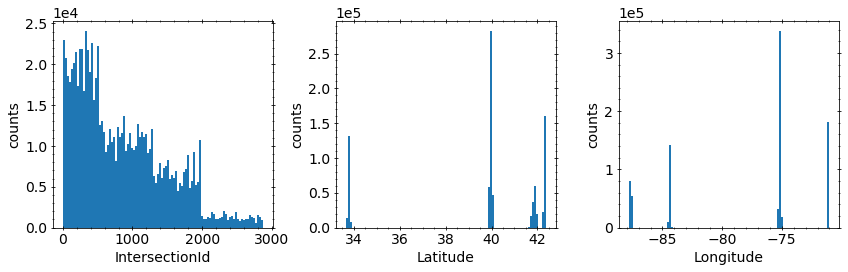

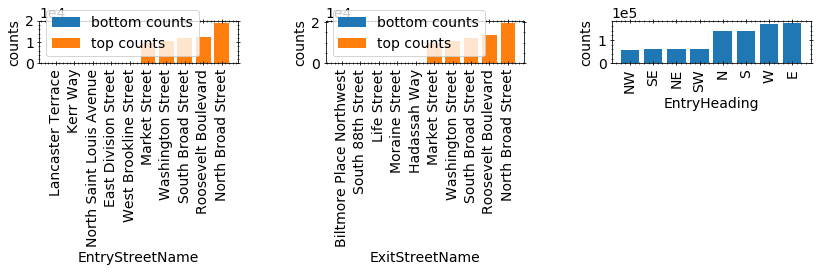

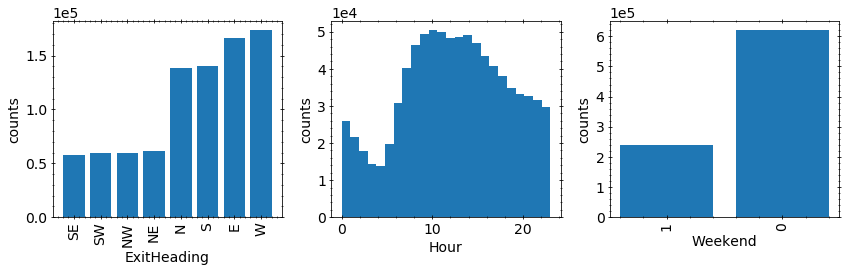

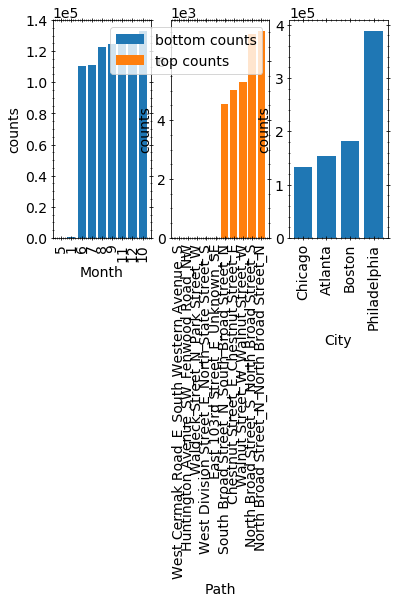

In [18]:
importlib.reload(JLpyUtils.plot)
JLpyUtils.plot.hist_or_bar(X, categorical_headers=headers_dict['categorical features'])

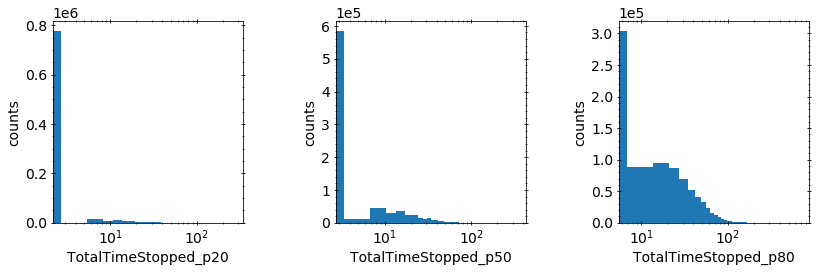

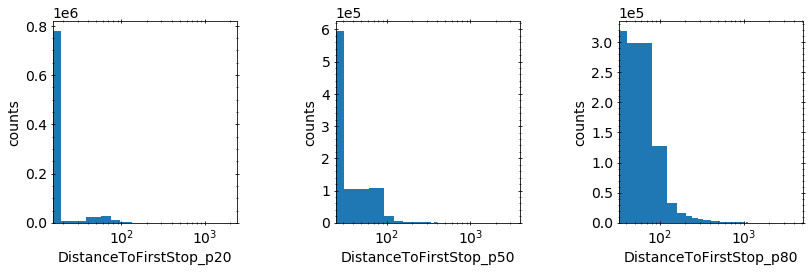

In [19]:
JLpyUtils.plot.hist_or_bar(y, xscale='log')

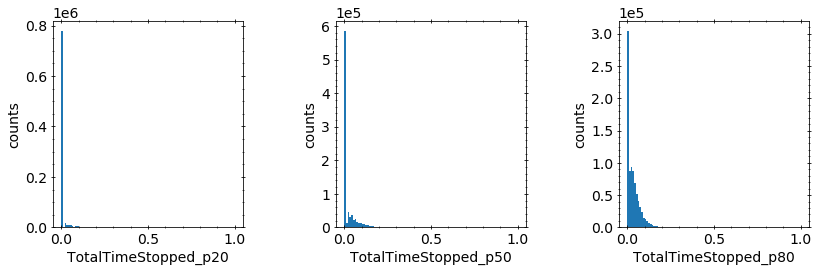

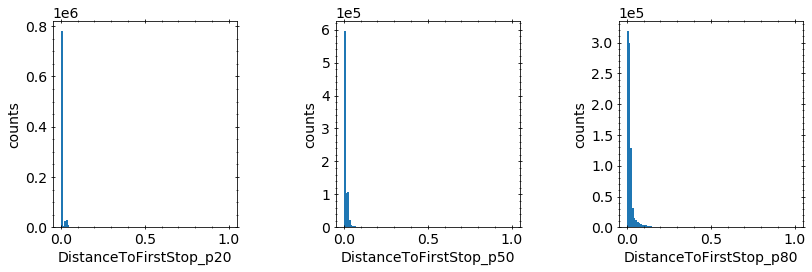

In [54]:
Scaler_y = sklearn.preprocessing.MinMaxScaler()
Scaler_y.fit(y)

y_scaled = pd.DataFrame(Scaler_y.transform(y), columns= y.columns)
JLpyUtils.plot.hist_or_bar(y_scaled, xscale='linear')

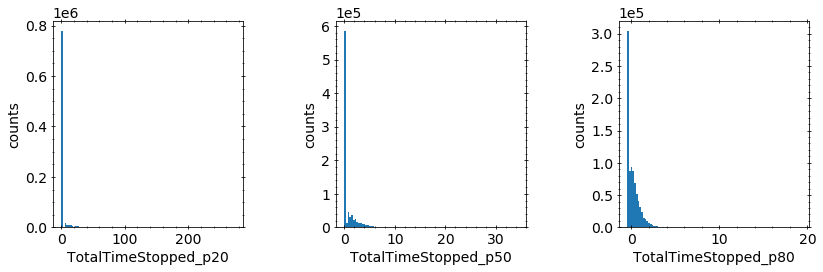

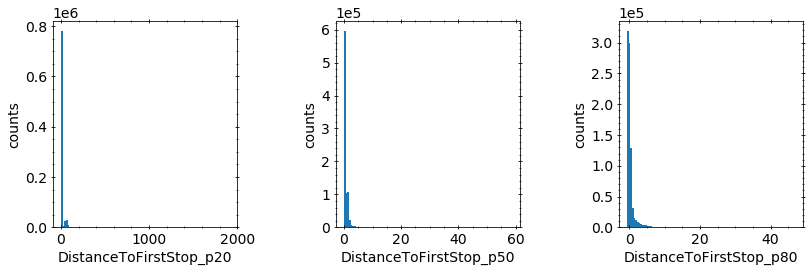

In [55]:
Scaler_y = sklearn.preprocessing.RobustScaler()
Scaler_y.fit(y)

y_scaled = pd.DataFrame(Scaler_y.transform(y), columns= y.columns)
JLpyUtils.plot.hist_or_bar(y_scaled, xscale='linear')

# Scale the Labels

In [73]:
class Scaler_y_pipe():
    def __init__(self, Scalers):
        self.Scalers = Scalers
    def fit_transform(self, y):
        for Scaler_ in self.Scalers:
            try:
                Scaler_.fit(y)
                y = Scaler_.transform(y)
            except:
                y = Scaler_.fit_transform(y)
        return y
    
    def inverse_transform(self, y):
        for Scaler_ in reversed(self.Scalers):
            y = Scaler_.inverse_transform(y)
        return y

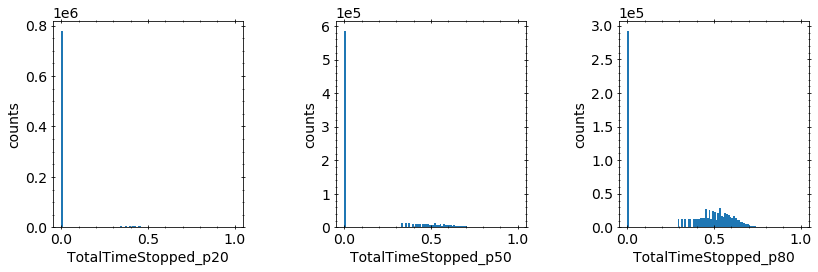

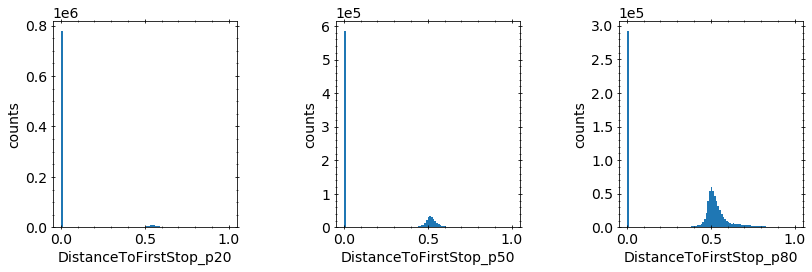

In [74]:
importlib.reload(JLpyUtils.ML.preprocessing)

Scaler1_y = JLpyUtils.ML.preprocessing.log.log1p()
Scaler2_y = sklearn.preprocessing.MinMaxScaler()

Scalers_y = Scaler_y_pipe([Scaler1_y, Scaler2_y])
y_scaled = pd.DataFrame(Scalers_y.fit_transform(y), columns= y.columns)

JLpyUtils.plot.hist_or_bar(y_scaled, xscale='linear')

# Feature Engineer

In [76]:
feat_eng_pipe = JLpyUtils.ML.preprocessing.feat_eng_pipe(path_report_dir= path_report_dir, 
                                                         overwrite=False)

In [77]:
import sklearn.preprocessing

feat_eng_pipe.Scalers_dict = {'MinMaxScaler':sklearn.preprocessing.MinMaxScaler()}
feat_eng_pipe.Imputer_continuous_dict = {'median':{None:None}}
feat_eng_pipe.OneHot_cases = [False]
feat_eng_pipe.__dict__

{'path_report_dir': '/mr3_boltprod_john_t_leonard/Data_Science_Projects./outputs/Project_Kaggle_BigQuery-Geotab_Intersection_Congestion',
 'path_feat_eng_root_dir': '/mr3_boltprod_john_t_leonard/Data_Science_Projects./outputs/Project_Kaggle_BigQuery-Geotab_Intersection_Congestion/outputs/feat_eng',
 'verbose': 1,
 'overwrite': False,
 'OneHot_cases': [False],
 'Scalers_dict': {'MinMaxScaler': MinMaxScaler(copy=True, feature_range=(0, 1))},
 'Imputer_categorical_dict': {'most_frequent': {None: None}},
 'Imputer_continuous_dict': {'median': {None: None}},
 'AbsCorrCoeff_thresholds': [0.99],
 'save': <function JLpyUtils.file_utils.save(obj, filename, format_, path_dir)>,
 'load': <function JLpyUtils.file_utils.load(filename, format_, path_dir, headers='infer')>}

## Fit

In [17]:
feat_eng_pipe.fit(X, headers_dict)

-------------------------------- feat_eng_pipe fit --------------------------------
LabelEncode
	Scale: MinMaxScaler
		Impute Categorical Features: most_frequent [ None ]
			Impute Continuous Features: median [ None ]
				One Hot Encode: [ False ]
					CorrCoeffThreshold: [ 0.99 ]
------------------------------------ !Finished! ------------------------------------


## Transform

In [78]:
X_field = df_field[headers_dict['features']]

In [19]:
feat_eng_pipe.transform(X_field)

---------------------------- feat_eng_pipe transform ---------------------------
LabelEncode
	Scale: MinMaxScaler
		Impute Categorical Features: most_frequent [ None ]
			Impute Continuous Features: median [ None ]
				One Hot Encode: [ False ]
					CorrCoeffThreshold: [ 0.99 ]
------------------------------------ !Finished! ------------------------------------


In [79]:
feat_eng_pipe.path_feat_eng_root_dir

'/mr3_boltprod_john_t_leonard/Data_Science_Projects./outputs/Project_Kaggle_BigQuery-Geotab_Intersection_Congestion/outputs/feat_eng'

# Select Feat. Eng. Case of Interest

In [80]:
feat_eng_case_dir = os.path.join(feat_eng_pipe.path_feat_eng_root_dir,
                                 'LabelEncode',
                                 'Scaler_ID[MinMaxScaler]',
                                 'Imputer_categorical_ID[most_frequent]',
                                 'Imputer_iterator_classifier_ID[None]',
                                 'Imputer_continuous_ID[median]',
                                 'Imputer_iterator_regressor_ID[None]',
                                 'OneHot_case[False]',
                                 'CorrCoeffThreshold[0.99]')
feat_eng_case_dir

'/mr3_boltprod_john_t_leonard/Data_Science_Projects./outputs/Project_Kaggle_BigQuery-Geotab_Intersection_Congestion/outputs/feat_eng/LabelEncode/Scaler_ID[MinMaxScaler]/Imputer_categorical_ID[most_frequent]/Imputer_iterator_classifier_ID[None]/Imputer_continuous_ID[median]/Imputer_iterator_regressor_ID[None]/OneHot_case[False]/CorrCoeffThreshold[0.99]'

In [81]:
headers_dict = JLpyUtils.file_utils.load('headers_dict','json',feat_eng_case_dir)
headers_dict.keys()

dict_keys(['features', 'labels', 'categorical features', 'continuous features', 'headers after OneHot', 'headers after CorrCoeffThreshold'])

In [82]:
X = JLpyUtils.file_utils.load('X','csv',feat_eng_case_dir)
X = X.compute()
X.head()

,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,City
0,0.0,0.016227,0.202621,712.0,706.0,3.0,3.0,0.000000,0.0,6.0,0.0
1,0.0,0.016227,0.202621,712.0,706.0,5.0,5.0,0.000000,0.0,6.0,0.0
2,0.0,0.016227,0.202621,712.0,706.0,3.0,3.0,0.043478,0.0,6.0,0.0
3,0.0,0.016227,0.202621,712.0,706.0,5.0,5.0,0.043478,0.0,6.0,0.0
4,0.0,0.016227,0.202621,712.0,706.0,3.0,3.0,0.086957,0.0,6.0,0.0


In [83]:
X_field = JLpyUtils.file_utils.load('X_field','csv',feat_eng_case_dir)
X_field = X_field.compute()
X_field.head()

,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,City
0,1.0,0.011563,0.204822,1029.0,753.0,6.0,5.0,0.000000,0.0,6.0,0.0
1,1.0,0.011563,0.204822,1029.0,1018.0,6.0,6.0,0.000000,0.0,6.0,0.0
2,1.0,0.011563,0.204822,1029.0,1018.0,2.0,2.0,0.043478,0.0,6.0,0.0
3,1.0,0.011563,0.204822,1029.0,1018.0,6.0,6.0,0.043478,0.0,6.0,0.0
4,1.0,0.011563,0.204822,1029.0,1018.0,2.0,2.0,0.086957,0.0,6.0,0.0


In [84]:
test_size = 0.3
random_state = 0
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, 
                                                                            random_state=random_state, 
                                                                            test_size=test_size)
assert(X_train.shape[0]==y_train.shape[0])

# Model Selection

In [85]:
importlib.reload(JLpyUtils.ML.model_selection.default_models_dict)

n_features = X.shape[1]
n_labels = y.shape[1]
models=['XGBoost','Linear',  'DecisionTree', 'RandomForest']#'DenseNet''KNN',

models_dict = JLpyUtils.ML.model_selection.default_models_dict.regression(n_features, n_labels, models)
models_dict

{'XGBoost': {'model': MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              importance_type='gain',
                                              learning_rate=0.1, max_delta_step=0,
                                              max_depth=3, min_child_weight=1,
                                              missing=None, n_estimators=100,
                                              n_jobs=-1, nthread=None,
                                              objective='reg:linear',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None, subsample=1,
   

In [86]:
importlib.reload(JLpyUtils.ML.model_selection)
importlib.reload(JLpyUtils.ML.model_selection._search)
importlib.reload(JLpyUtils.ML.model_selection)
importlib.reload(JLpyUtils.ML.model_selection._search)

GridSearch_dir = os.path.join(feat_eng_case_dir,'GridSearchCV(y_MinMax_log1p_Scaled)')

metrics = {'r2_score': sklearn.metrics.r2_score}
GridSearchCV = JLpyUtils.ML.model_selection.GridSearchCV(models_dict,
                                                         cv=4, 
                                                         scoring={'metric': None, 
                                                                  'maximize': True}, 
                                                         metrics=metrics, 
                                                         retrain=False, 
                                                         path_root_dir=GridSearch_dir, 
                                                         n_jobs=-1, 
                                                         verbose=2)

In [87]:
GridSearchCV.fit(X_train, y_train, X_test, y_test)


---- XGBoost ----
path_model_dir: /mr3_boltprod_john_t_leonard/Data_Science_Projects./outputs/Project_Kaggle_BigQuery-Geotab_Intersection_Congestion/outputs/feat_eng/LabelEncode/Scaler_ID[MinMaxScaler]/Imputer_categorical_ID[most_frequent]/Imputer_iterator_classifier_ID[None]/Imputer_continuous_ID[median]/Imputer_iterator_regressor_ID[None]/OneHot_case[False]/CorrCoeffThreshold[0.99]/GridSearchCV(y_MinMax_log1p_Scaled)/XGBoost
Fitting 4 folds for each of 162 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 30 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 122.8min
[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed: 534.1min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 855.6min finished


[20:04:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	best_cv_score: 0.5209367920879513
	best_pred_score: 0.5313973595166276
	 r2_score : 0.5313973595166276

---- Linear ----
path_model_dir: /mr3_boltprod_john_t_leonard/Data_Science_Projects./outputs/Project_Kaggle_BigQuery-Geotab_Intersect

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    9.2s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    9.3s finished
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 30 concurrent workers.


	best_cv_score: 0.012101410787223224
	best_pred_score: 0.012201400156171424
	 r2_score : 0.012260803431537404

---- DecisionTree ----
path_model_dir: /mr3_boltprod_john_t_leonard/Data_Science_Projects./outputs/Project_Kaggle_BigQuery-Geotab_Intersection_Congestion/outputs/feat_eng/LabelEncode/Scaler_ID[MinMaxScaler]/Imputer_categorical_ID[most_frequent]/Imputer_iterator_classifier_ID[None]/Imputer_continuous_ID[median]/Imputer_iterator_regressor_ID[None]/OneHot_case[False]/CorrCoeffThreshold[0.99]/GridSearchCV(y_MinMax_log1p_Scaled)/DecisionTree
Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   26.5s finished
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


	best_cv_score: 0.4175688337277097
	best_pred_score: 0.4269516172732397
	 r2_score : 0.19783153232860515

---- RandomForest ----
path_model_dir: /mr3_boltprod_john_t_leonard/Data_Science_Projects./outputs/Project_Kaggle_BigQuery-Geotab_Intersection_Congestion/outputs/feat_eng/LabelEncode/Scaler_ID[MinMaxScaler]/Imputer_categorical_ID[most_frequent]/Imputer_iterator_classifier_ID[None]/Imputer_continuous_ID[median]/Imputer_iterator_regressor_ID[None]/OneHot_case[False]/CorrCoeffThreshold[0.99]/GridSearchCV(y_MinMax_log1p_Scaled)/RandomForest
Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 30 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  7.5min finished
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


	best_cv_score: 0.6554729505459936
	best_pred_score: 0.6618085628554758
	 r2_score : 0.5225260146862755


https://ml.dask.org/examples/xgboost.html

In [ ]:
importlib.reload(JLpyUtils.ML.inspection.compare)

metrics = {'r2_score': sklearn.metrics.r2_score,
           'mse':sklearn.metrics.mean_squared_error,
           'mae':sklearn.metrics.mean_absolute_error}

_, df_metrics = JLpyUtils.ML.inspection.compare.model_metrics(GridSearchCV.models_dict, metrics, X_test, y_test)

# Fetch BoB model

In [89]:
BoB_model_ID = df_metrics['model'].iloc[-1]
BoB_model_ID

'XGBoost'

In [90]:
BoB_model = GridSearchCV.models_dict[best_model_ID]['best_model']
BoB_model

NameError: name 'best_model_ID' is not defined

# Evaluate on Field Data

In [ ]:
y_field = BoB_model.predict(X_field)
y_field = pd.DataFrame(Scaler_y.inverse_transform(y_field), columns = list(y.columns))

#ensure no values outside physical limits
for header in y_field.columns:
    y_field[y_field[header]<0] = 0

y_field.head()

In [ ]:
def reformat_field_preds_for_submission(y_field):
    submission_metric_map = JLpyUtils.file_utils.load('submission_metric_map','json',
                                                      path_competition_data)
    
    # ensure consistant ordering of columns
    y_field = y_field[[submission_metric_map[key] for key in submission_metric_map.keys()]]
    y_field = np.array(y_field)
    
    n_rows = y_field.shape[0]*y_field.shape[1]
    
    y_field_formatted = {'TargetID':['empty' for val in range(n_rows)],
                         'Target': [0 for val in range(n_rows)] 
                        }
    
    
    r = 0
    for i in range(y_field.shape[0]):
        for j in range(y_field.shape[1]):
            y_field_formatted['TargetID'][r] = str(i)+'_'+str(j)
            y_field_formatted['Target'][r] = y_field[i,j]
            r+=1
    
    y_field_formatted = pd.DataFrame.from_dict(y_field_formatted)
    
    return y_field_formatted
                      
y_field_formatted = reformat_field_preds_for_submission(y_field)
y_field_formatted.head()

In [ ]:
y_field_formatted.tail()

In [ ]:
y_field_formatted.to_csv(os.path.join(GridSearch_dir, 'y_field_formatted.csv'),
                         index=False)

In [88]:
GridSearch_dir

'/mr3_boltprod_john_t_leonard/Data_Science_Projects./outputs/Project_Kaggle_BigQuery-Geotab_Intersection_Congestion'